<a href="https://colab.research.google.com/github/bmitch26/GPA-vs.-Study-Hours-EDA-Linear-Regression/blob/main/GPA_EDA_%2B_Linear_Regression_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Brett Mitchell
'''
The following dataset includes 193 students at a university,
their grade point averages(GPA), and hours studied per week.
An exploratory data analysis(EDA) and linear regression
model is created to see to see if there is a relationship
between these two variables. At the end of experimentation,
it is determined that there is a slight positive correlation
between hours studied and GPA.

# Hypothesis: I hypothesize that GPA and study hours will have
a strongly related performance, as increased time spent studying
can be an indicator of an individual with greater drive to
achieve high performance in school.
'''

# Importing libraries
import pandas as pd # Data/DataFrame Manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Exploratory Data Analysis
# Initial Exploration

# Importing CSV file
df = pd.read_csv('gpa_study_hours.csv')
df.head()

,gpa,study_hours
0,4.00,10.0
1,3.80,25.0
2,3.93,45.0
3,3.40,10.0
4,3.20,4.0


In [ ]:
# Checking for null values and appropriate data typing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gpa          193 non-null    float64
 1   study_hours  193 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


In [ ]:
# Summary statistics
df.describe()

,gpa,study_hours
count,193.000000,193.000000
mean,3.586166,17.476684
std,0.285482,11.408980
min,2.600000,2.000000
25%,3.400000,10.000000
50%,3.620000,15.000000
75%,3.800000,20.000000
max,4.300000,69.000000


<Axes: xlabel='gpa', ylabel='Count'>

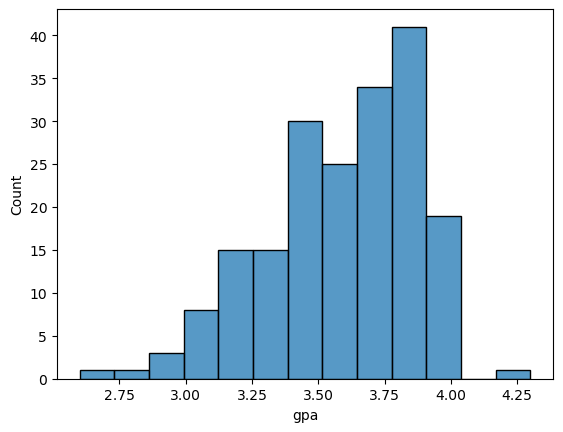

In [ ]:
# Histogram of GPA values
sns.histplot(data=df,x='gpa')

<Axes: xlabel='gpa'>

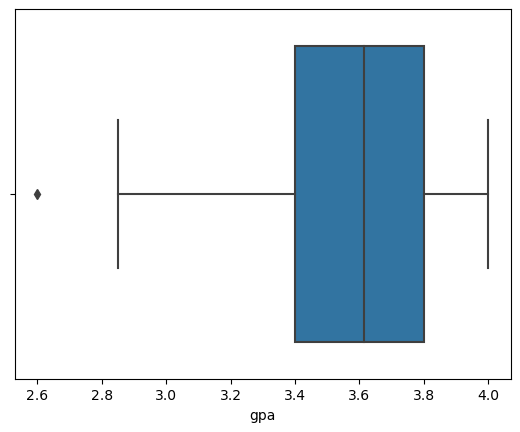

In [ ]:
# Data Cleaning
'''
Must ensure ranges are as expected before proceeding;
GPA cannot exceed 4.0, so must dataset must be cleaned.
The GPA outlier on the lower end is still greater than
the minimum GPA value (0.0), so it is kept in the
observation.
'''
max_gpa = 4.0
cleaned_df = df[df['gpa'] <= max_gpa]
sns.boxplot(data=cleaned_df,x='gpa')

Axes(0.125,0.11;0.775x0.77)


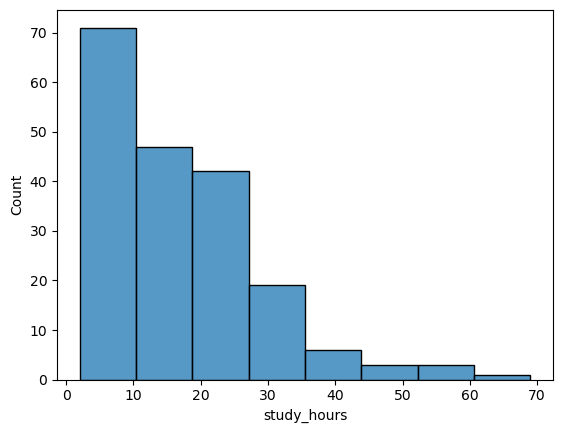

In [ ]:
# Histogram of study hours
print(sns.histplot(data=cleaned_df,x='study_hours',bins=8))

Axes(0.125,0.11;0.775x0.77)


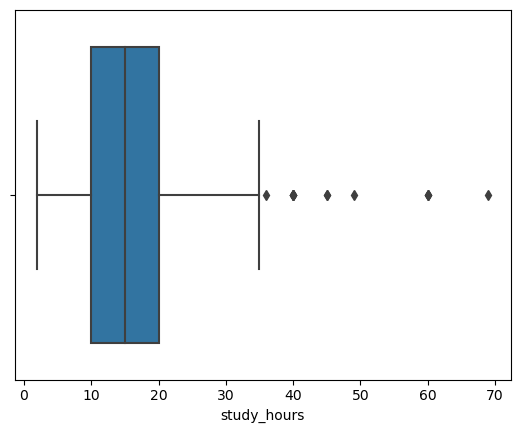

In [ ]:
print(sns.boxplot(data=cleaned_df,x='study_hours'))

Axes(0.125,0.11;0.775x0.77)
                  gpa  study_hours
gpa          1.000000     0.133014
study_hours  0.133014     1.000000


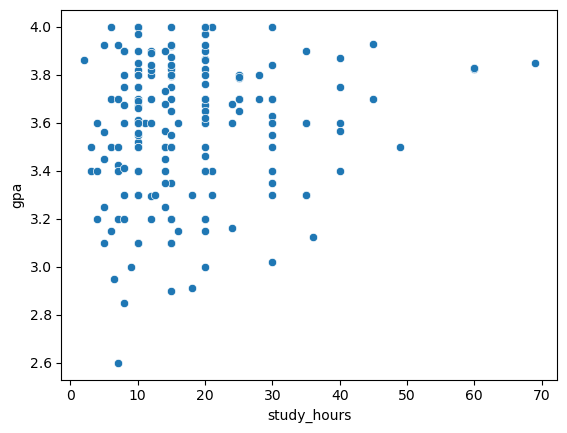

In [ ]:
# Examining correlation and relationships in data
print(sns.scatterplot(data=cleaned_df,x='study_hours',y='gpa'))
print(df.corr())

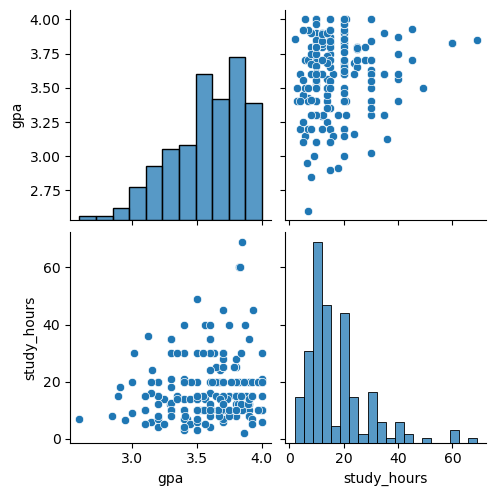

In [ ]:
# Pairplot
sns.pairplot(data=cleaned_df)

<Axes: >

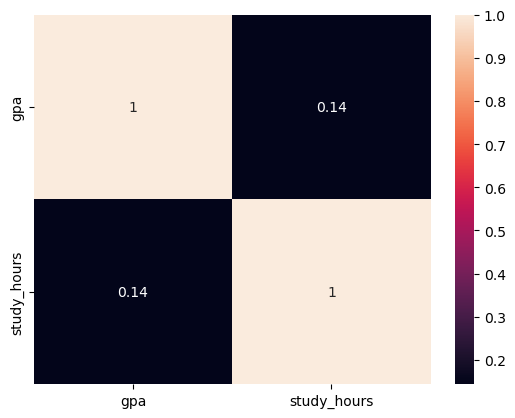

In [ ]:
# Heatmap for correlation insight
sns.heatmap(data=cleaned_df.corr(), annot=True)

In [ ]:
# Feature Engineering and hypothesis generation

In [ ]:
# Feature Engineering: Creating a category
twenty_fifth = cleaned_df['gpa'].quantile(0.25)
median = cleaned_df['gpa'].median()
seventy_fifth = cleaned_df['gpa'].quantile(0.75)
maximum = cleaned_df['gpa'].max()
labels = ["Poor", "Below Avg", "Moderate", "High"]
bins = [0, twenty_fifth, median, seventy_fifth, maximum]
cleaned_df['gpa_category'] = pd.cut(cleaned_df['gpa'],labels=labels,bins=bins)

In [ ]:
print(cleaned_df[['gpa','gpa_category']])

      gpa gpa_category
0    4.00         High
1    3.80     Moderate
2    3.93         High
3    3.40         Poor
4    3.20         Poor
..    ...          ...
188  3.60    Below Avg
189  3.70     Moderate
190  3.84         High
191  3.80     Moderate
192  3.10         Poor

[192 rows x 2 columns]


<Axes: xlabel='gpa', ylabel='Count'>

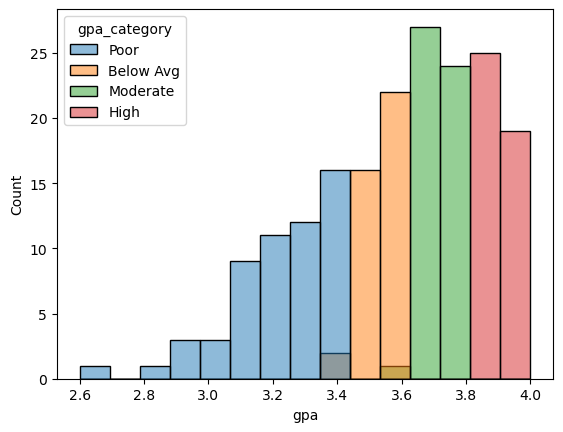

In [ ]:
sns.histplot(data=cleaned_df,
             x='gpa',
             hue='gpa_category',
             bins=15,
             alpha=0.5)

<Axes: xlabel='gpa', ylabel='Density'>

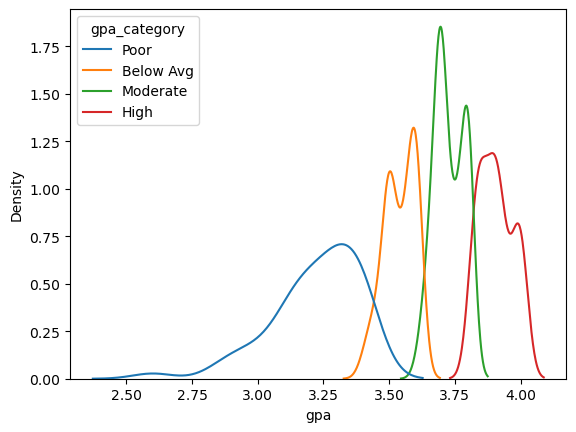

In [ ]:
# Kernel Density Plot
sns.kdeplot(data=cleaned_df,x='gpa',hue='gpa_category')

In [ ]:
'''
Fitting a linear regression model to the data: ols, or ordinary least
squares, is a method suited well for insights so it is utilized here.
First argument passed is a formula: response variable written to the
left of the tilde, and the explanatory variable is written to the right
'''

# Response variable = dependent(y); explanatory = independent variable(x)
# gpa = response; study_hours = explanatory
gpa_vs_sh = ols('gpa ~ study_hours', data=cleaned_df)
gpa_vs_sh = gpa_vs_sh.fit() # fits the model
print(gpa_vs_sh.params) # params contains models parameters

Intercept      3.520250
study_hours    0.003551
dtype: float64


In [ ]:
'''
Slope-intercept equation is as follows:
gpa = 3.52 + 0.003551 * study_hours
This indicates that for every additional hour studied we expect GPA
to increase by .003551 points, indicating a small positive correlation.
'''

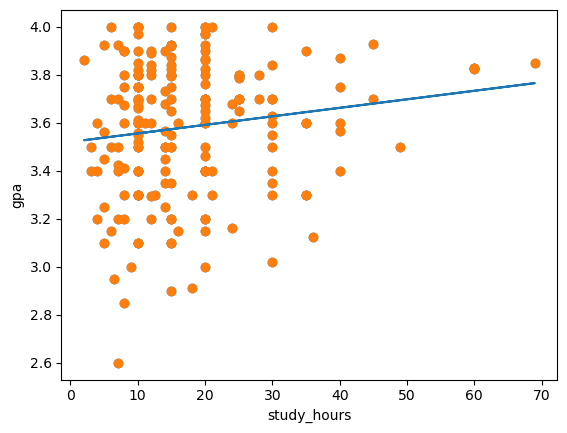

Mean Squared Error: 0.07719434553718153


In [ ]:
# Scikit-learn linear regression for prediction
# Features = X, target values = y.
X = cleaned_df.drop('gpa',axis=1).values
y = cleaned_df['gpa'].values

X_study_hours = X[:, 0] # study_hours is 0th column
X_study_hours = X_study_hours.reshape(-1,1) # X must be 2D Array

reg = LinearRegression()
reg.fit(X_study_hours, y) # fit model to the feature observations
predictions = reg.predict(X_study_hours)

# Plotting
plt.scatter(X_study_hours, y)
predictions = reg.predict(X_study_hours)
plt.scatter(X_study_hours, y)
plt.plot(X_study_hours, predictions)
plt.ylabel('gpa')
plt.xlabel('study_hours')
plt.show()

# Calculating mean squared error
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

In [ ]:
'''
The orange dots represent all of the data points, and the blue line
represents the linear regression. The Mean Squared Error(MSE) provides
a numerical measure of the over quality of the linear regression model,
where a lower MSE indicates a better fit. The MSE indicates how far,
on average, the predicted values are from the actual values. An MSE of
0.077 is relatively high, and can be visualized from the linear
regression model with many data points ranging far below and above
the regression line.

Contrary to my proposed hypothesis, it can be seen (with the linear
regression model and MSE) that there is only a slight positive
correlation between more study hours and GPA. One major factor to
possibly consider is that the major of each student was not
accounted for, which may have a large impact on the amount of hours
needed for study per week to attain a high GPA.
'''